In [2]:
%load_ext autoreload
%autoreload 2

import os,sys,warnings
import h5py, pandas
import numpy as np
np.seterr(invalid=['ignore','warn'][0])
np.set_printoptions(legacy='1.25')
import math,cmath,pickle
from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit,fsolve
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.titlesize'] = 20
mpl.rcParams['figure.figsize'] = [6.4*1.2,4.8*1.2]
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['lines.marker'] = 's'
mpl.rcParams['lines.linestyle'] = ''
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['errorbar.capsize'] = 6
mpl.rcParams['xtick.labelsize'] = mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['xtick.major.size'] = mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.top']=mpl.rcParams['ytick.right']=True
mpl.rcParams['xtick.direction']=mpl.rcParams['ytick.direction']='in'
mpl.rcParams['legend.fontsize'] = 24
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


Text(0, 0.5, '$CDR$')

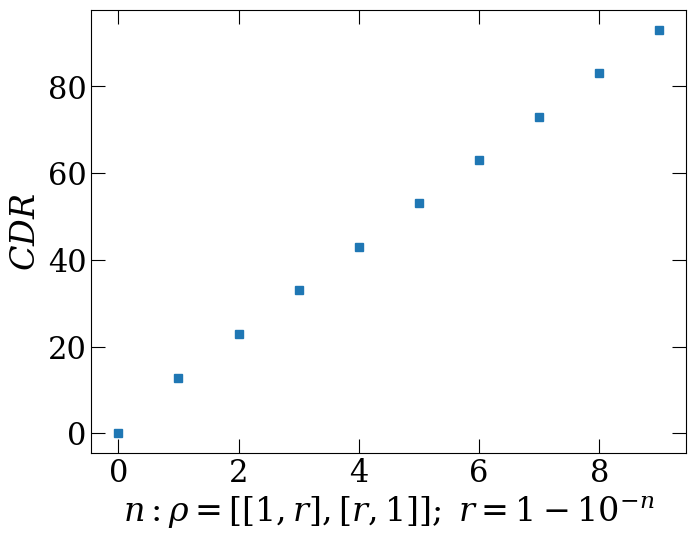

In [8]:
def checkCorrelation(cov):
    errs=np.sqrt(np.diag(cov))
    rho=cov/np.outer(errs, errs)
    
    evals=np.linalg.eigvalsh(rho)
    eval_max=np.max(evals); eval_min=np.min(evals)
    kappa=eval_max/eval_min
    CDR=10*np.log10(kappa)
    
    # print(CDR)
    return CDR

ns=np.arange(10)
rs=1-10.**(-ns)
cdrs=[checkCorrelation(np.array([[1,r],[r,1]])) for r in rs]
plt.plot(ns,cdrs)
plt.xlabel(r'$n: \rho=[[1,r],[r,1]];\;r=1-10^{-n}$')
plt.ylabel(r'$CDR$')

Text(0, 0.5, '$CDR$')

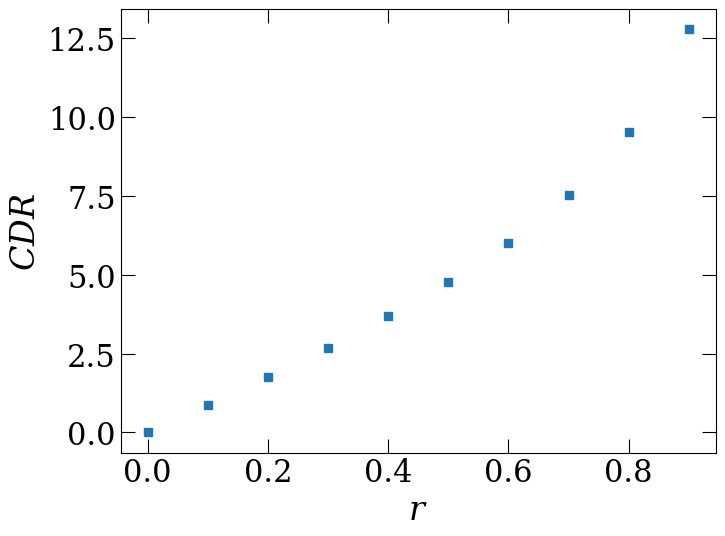

In [7]:
def checkCorrelation(cov):
    errs=np.sqrt(np.diag(cov))
    rho=cov/np.outer(errs, errs)
    
    evals=np.linalg.eigvalsh(rho)
    eval_max=np.max(evals); eval_min=np.min(evals)
    kappa=eval_max/eval_min
    CDR=10*np.log10(kappa)
    
    # print(CDR)
    return CDR

rs=np.arange(0,1,0.1)
cdrs=[checkCorrelation(np.array([[1,r],[r,1]])) for r in rs]
plt.plot(rs,cdrs)
plt.xlabel(r'$r$')
plt.ylabel(r'$CDR$')